In [14]:
from IPython.display import display, Math, Latex

Alice and Bob participate in a game. There is a pool table behind a curtain. There is another friend named Carol can play on the table.

Carol rolls a ball down the table, and mark the point where the ball landed.

Carol continuously rolls more balls down the table, if the ball runs to the right of the mark, give Alice 1 point, otherwise give Bob 1 point.

After 8 turns, Alice got 5, Bob got 3, and who get 6 points win.

What is the probability of Bob winning the game?


Let's call p the probabilitiy of Bob win a round. It should be fixed at the time Carol marks the anchor point. 
Let's call D the observed state (D = Alice (5 point), Bob (3 point))
Let's call B the event when Bob wins the game.

**Naive frequentist approach**

Based on MLE, we estimate p based on the following likelihood:

$P(D|p) = p^5 * ( 1 - p )^3$

Maximize this give: 

$p = 3 / 8$

Now we use this value of p to estimate the probability of Bob winning the game, which only happens if Bob wins 3 more rounds while Alice still has 5 points only:

$P(B|D) = p^3$  (1)

Do the calculation:

In [13]:
3.0 ** 3 / 8.0 ** 3

0.052734375

** Bayesian approach **

Bayesian says that based on current observation, we have some uncertainty on the model parameter p, and will quantify that by the following posterior:

$P(p|D)$

while the prior of p (uncertainty of p when we haven't observed anything) is as following:

$P(p)$

Now remember the marginalization method:

$P(X) = \sum {P(X, Y)}$

It has a continuous form:

$P(X) = \int P(X, Y) dY$

Also it could be stated in a conditional form as well:

$P(X | Z) = \int P(X, Y | Z) dY$

Applying that, we calculate the chance that Bob winning the game, again by:

$P(B|D) = \int P(B, p|D) dp $

$       = \int P(B|p, D) * P(p|D) dp  $  based on conditionally Bayes rule 

Note that the formula inside the integral is exactly the calculation at (1) but with only one value of p = 3/8. Here instead we have a distribution of P(p|D). 

Replace $P(B|p, D) = p^3$ and apply Bayes rule for $P(p|D)$ give:

$       = \int p^3 * \frac{P(D|p) * P(p)}{P(D)}  dp  $ 

Note that $P(D|p) = p^3 * (1 - p)^5$ and assume uniform distribution of p at beginning $P(p)$, and also move $P(D)$ out of integral give:

$       = \frac{\int p^3 * p^3 * (1 - p)^5  dp}{P(D)}  $

The numerator would become:

$\int p^6* (1 - p)^5 dp $ 



Now similarly for the denominator, do the integration as well:

$P(D) = \int P(D|p) * P(p) dp $ 

$ = \int p^3 * (1 - p)^5 dp $ 

Do the calculation:

In [16]:
import scipy.integrate as integrate

enumerator = integrate.quad ( lambda p : p ** 6 * ( 1 - p ) ** 5, 0, 1 ) [0]

denominator = integrate.quad ( lambda p : p ** 3 * ( 1 - p ) ** 5, 0, 1 ) [0]

result = enumerator / denominator

print result

0.0909090909091


**What is the difference in this problem**

Consider $P(p|D)$, basically the first approach gives a discrete probability $P(3/8) = 1$ (it could be thought of as a continuous distribution that has pdf (probability density function) = $\infty$ at 3/8 and 0 otherwise) while the second approach gives the following distribution of $P(p|D)$:

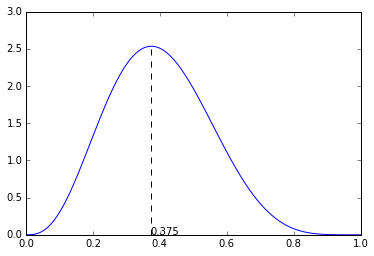

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

step = 0.0001
xs = np.arange(0, 1, step)

ys = np.power(xs,3) * np.power(1 - xs, 5) / denominator

plt.plot(xs, ys)

best = 3.0 / 8
plt.text( best, 0, str(best) )
plt.vlines(best, 0, ys[best/step], linestyles=u'dashed')

The distribution also peaks at 3/8

Extra credit problem:
    
Imagine the pool behinds the curtain has infinity dimension so that the ball can go straight without bouncing on the edges. We know that the direction Carol rolls the ball is of uniform distribution. Whether and how would we incorporate that knowledge into our calculation? If we incorporate it, can you use Bayesian approach to calculate what is the probability of Bob winning the game?